## Lead Scoring Case Study
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Step 1: Importing Data

In [3]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [27]:
# Importing all datasets
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# Let's check the dimensions of the dataframe
leads_data.shape

(9240, 37)

In [7]:
# let's look at the statistical aspects of the dataframe
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Let's see the type of each column
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data Quality Checks

In [9]:
#Check the number of null values in the columns
leads_data.isnull().sum()/len(leads_data) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [15]:
leads_data['Country'].value_counts()/len(leads_data) * 100
## 70% of the data belongs to India , can ignore this feature

India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switzerland   

In [16]:
# checking for Specialization
leads_data['Specialization'].value_counts()/len(leads_data) * 100

Select                               21.017316
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [28]:
#creating a copy of the original DF
leads_df = leads_data.copy()

leads_df['Specialization'] = leads_df['Specialization'].replace('Select', 'Other')
## assigning 'Other' to select

In [29]:
## Further grouping the above 
#1. Finance and Banking
#2. Management (Combine similar management specializations)
#3. Marketing and Advertising
#4. IT and Project Management
#5. Supply Chain and Operations
#6. Travel, Tourism, and Hospitality
#7. International Business
#8. Healthcare Management
#9. Retail and E-commerce
#10. Services Excellence
#11. Agriculture and Rural Business

# assigning null values to other

leads_df['Specialization'].fillna('NA', inplace=True)

group_mapping = {
    'Finance Management': 'Finance and Banking',
    'Banking, Investment And Insurance': 'Finance and Banking',
    'Human Resource Management': 'Management',
    'Marketing Management': 'Management',
    'Operations Management': 'Management',
    'Business Administration': 'Management',
    'Healthcare Management': 'Management',
    'Hospitality Management': 'Management',
    'Retail Management': 'Management',    
    'IT Projects Management': 'IT and Projects',    
    'Supply Chain Management': 'Supply Chain and Operations',    
    'Media and Advertising': 'Media and Advertising',    
    'International Business': 'International Business',    
    'E-COMMERCE': 'E-commerce and Business',
    'E-Business': 'E-commerce and Business',    
    'Travel and Tourism': 'Travel and Tourism',   
    'Rural and Agribusiness': 'Rural and Agribusiness',    
    'Services Excellence': 'Other Services'
}


# Apply the grouping to create a new 'Grouped_Specialization' column
leads_df['Grouped_Specialization'] = leads_df['Specialization'].replace(group_mapping)


In [58]:
leads_df['Grouped_Specialization'].value_counts()

Management                     2965
Other                          1942
NA                             1438
Finance and Banking            1314
IT and Projects                 366
Supply Chain and Operations     349
Media and Advertising           203
Travel and Tourism              203
International Business          178
E-commerce and Business         169
Rural and Agribusiness           73
Other Services                   40
Name: Grouped_Specialization, dtype: int64

In [31]:
## assigning 'Other' to select
leads_df['How did you hear about X Education'] = leads_df['How did you hear about X Education'].replace('Select', 'Other')

# assigning null values to other
leads_df['How did you hear about X Education'].fillna('NA', inplace=True)

# rename column
leads_df.rename(columns={'How did you hear about X Education': 'Hear_Source'}, inplace=True)

In [36]:
leads_df['What is your current occupation'].value_counts()

# assigning null values to other
leads_df['What is your current occupation'].fillna('NA', inplace=True)

# rename column
leads_df.rename(columns={'What is your current occupation': 'Occupation'}, inplace=True)

In [41]:
# converting these to binary values 0 and 1 

# Search
# Magazine
# Newspaper Article
# X Education Forums
# Newspaper
# Digital Advertisement

# List of variables to map

varlist =  ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_df[varlist] = leads_df[varlist].apply(binary_map)

In [53]:
leads_df.isna().sum()/len(leads_df) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                    0.000000
Hear_Source                                       0.000000
Occupation                                        0.000000
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [ ]:
# dropping unnecessary cols - containing high missing values and irrelevant to this case study
#country- high missing and mostly skewed to India data
#What matters most to you in choosing a course - irrelevant info and missing data

In [55]:
leads_df.drop(['Country','What matters most to you in choosing a course','Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','I agree to pay the amount through cheque','Last Notable Activity','Specialization'],axis=1,inplace=True)

In [71]:
#checking again
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Do Not Call                             9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9240 non-null   int64  
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9137 non-null   object 
 10  Hear_Source                             9240 non-null   obje

In [61]:
#further cleaning and grouping data 
#Lead Source
leads_df['Lead Source'].fillna('NA', inplace=True)

source_mapping = {
    'Search Engines': ['Google', 'Organic Search', 'bing', 'google', 'Yahoo'],
    'Website': ['Welingak Website', 'welearnblog_Home', 'WeLearn', 'blog'],
    'Chat': ['Olark Chat', 'Live Chat'],
    'Referral': ['Reference', 'Referral Sites'],
    'Social Media': ['Facebook', 'Social Media', 'youtubechannel'],
    'Others': ['Direct Traffic', 'Click2call', 'Press_Release', 'testone', 'Pay per Click Ads', 'NC_EDM','NA']
}

# Create a new column for grouped lead sources
leads_df['Grouped_Lead_Source'] = leads_df['Lead Source'].apply(
    lambda x: next((group for group, sources in source_mapping.items() if x in sources), 'Others')
)

leads_df.drop(['Lead Source'],axis=1,inplace=True)

In [70]:
# Convert 'TotalVisits' to numeric and replace any non-numeric values with NaN
leads_df['TotalVisits'] = pd.to_numeric(leads_df['TotalVisits'], errors='coerce')

# Convert 'Total Time Spent on Website' to numeric and replace any non-numeric values with NaN
leads_df['Total Time Spent on Website'] = pd.to_numeric(leads_df['Total Time Spent on Website'], errors='coerce')

# Convert NaN to 0 for the columns
leads_df[['TotalVisits', 'Total Time Spent on Website']] = leads_df[['TotalVisits', 'Total Time Spent on Website']].fillna(0).astype(int)


In [74]:
leads_df['Page Views Per Visit'].fillna(0,inplace=True)

In [77]:
# converting these to binary values 0 and 1 
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_df[varlist] = leads_df[varlist].apply(binary_map)

In [80]:
# City
leads_df['City'] = leads_df['City'].replace('Select','Other Cities')

In [82]:
leads_df['City'].fillna('Other Cities',inplace=True)

In [84]:
leads_df['Last Activity'].fillna('Unknown',inplace=True)

In [92]:
# dropping prospect ID as irrelevant

leads_df.drop(['Prospect ID'],axis=1,inplace=True)

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Categorical Variables


In [93]:
#checking categorical columns
c_col = [i for i in leads_df.columns if leads_df[i].dtype == "object"]
[i for i in leads_df.columns if i in c_col]

['Lead Origin',
 'Last Activity',
 'Hear_Source',
 'Occupation',
 'Through Recommendations',
 'City',
 'Grouped_Specialization',
 'Grouped_Lead_Source']

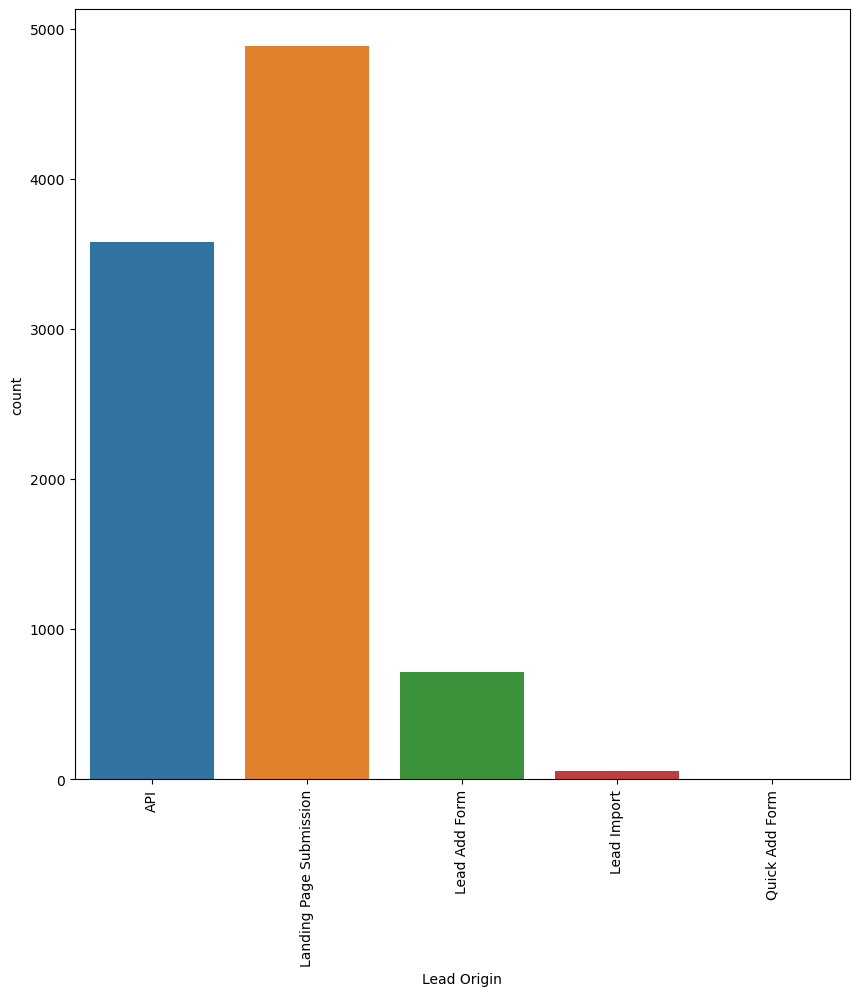

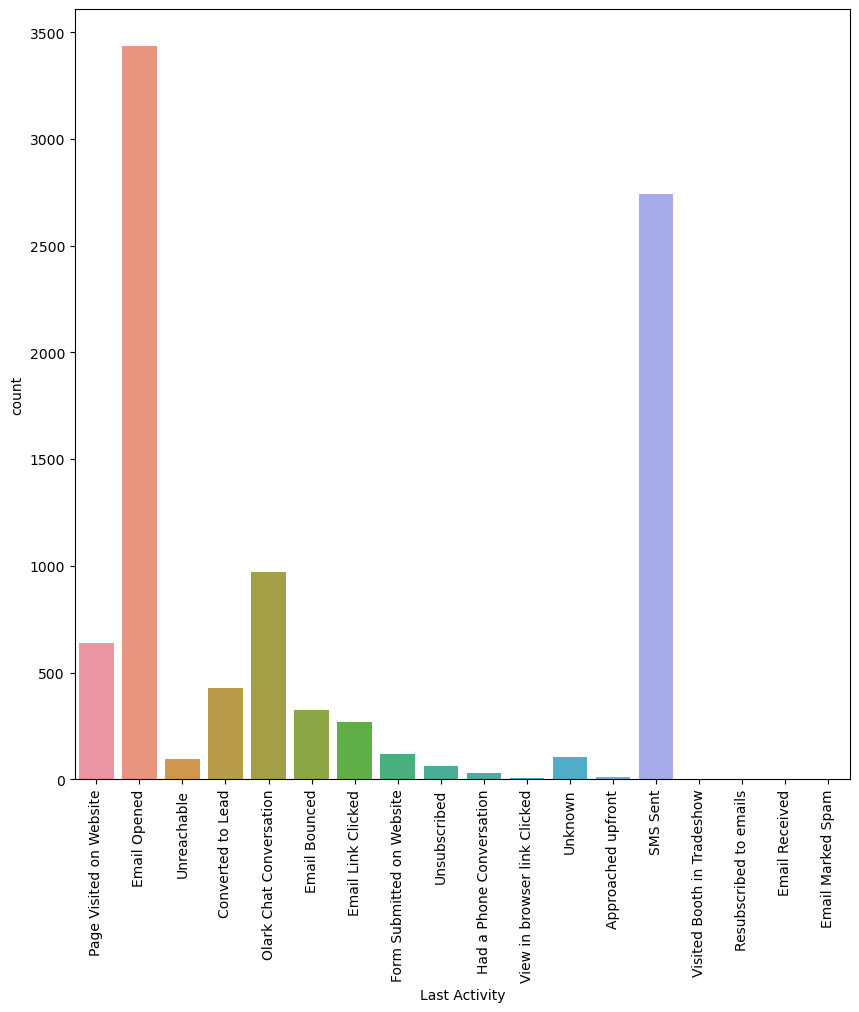

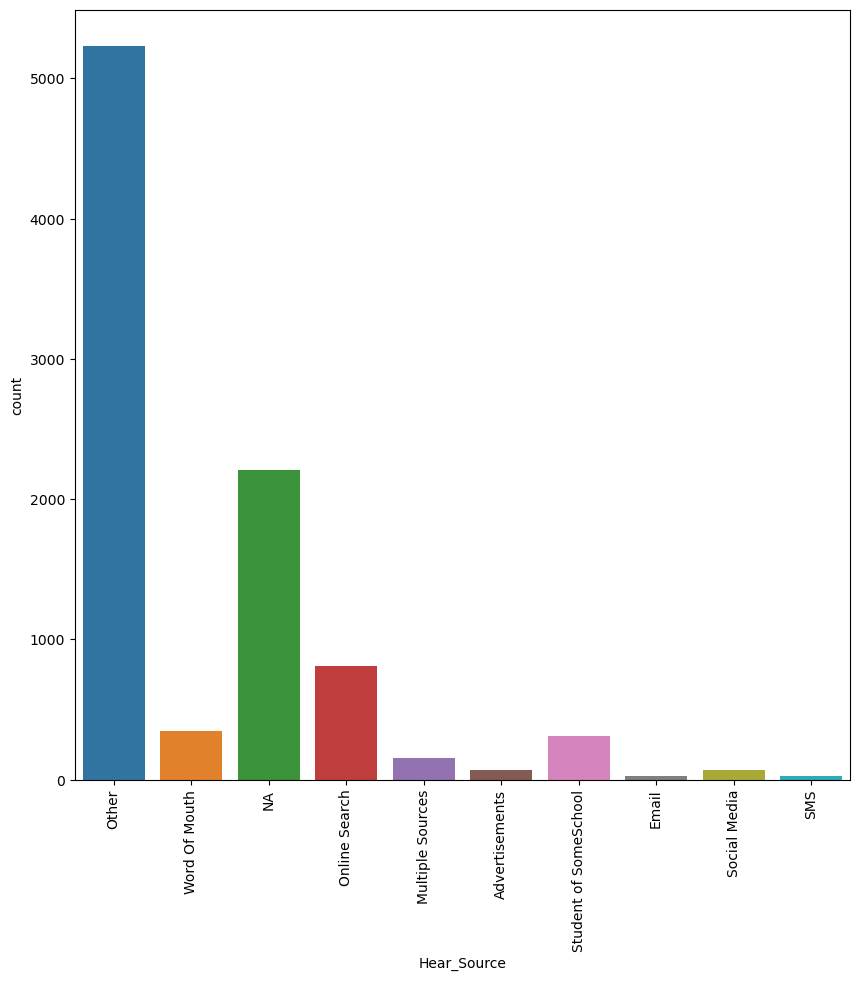

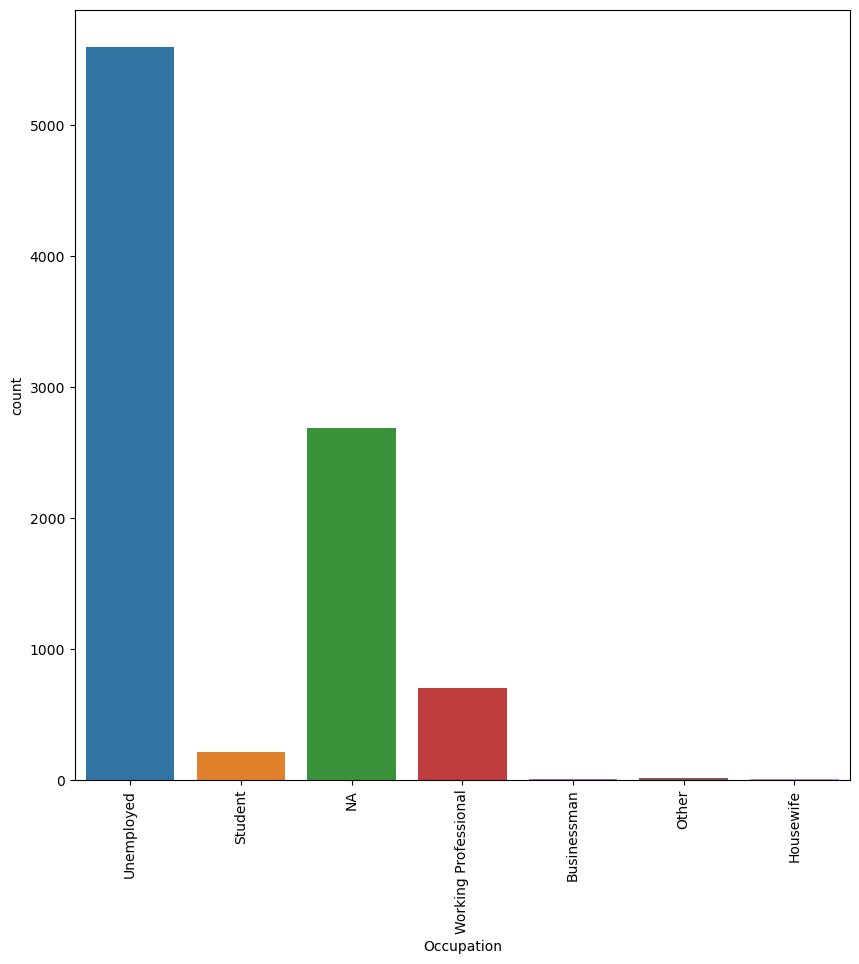

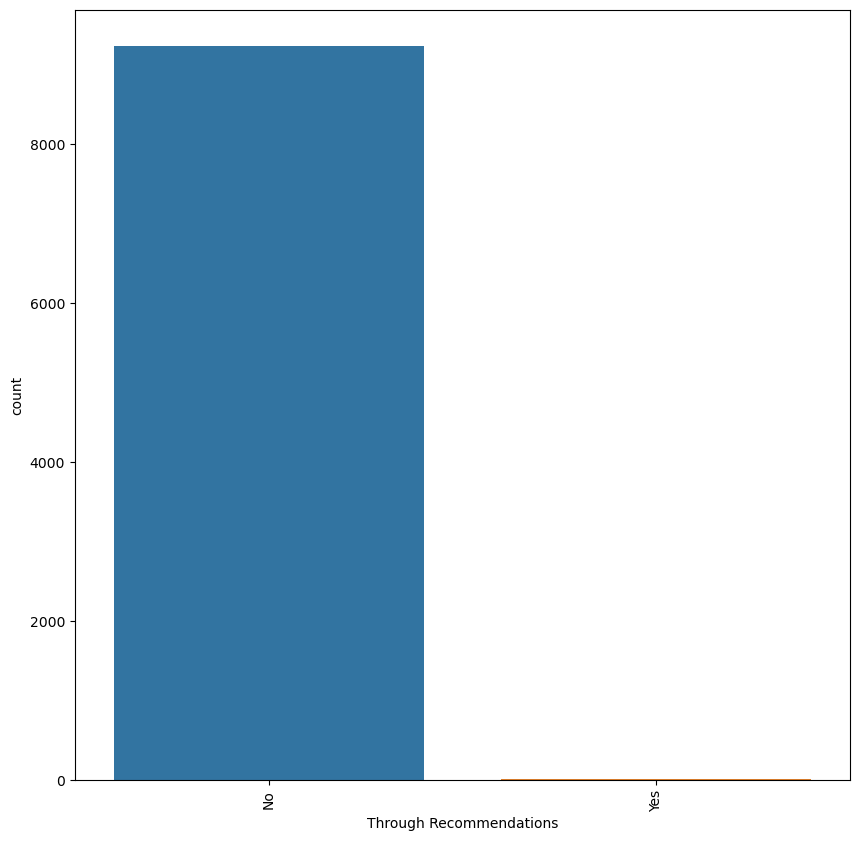

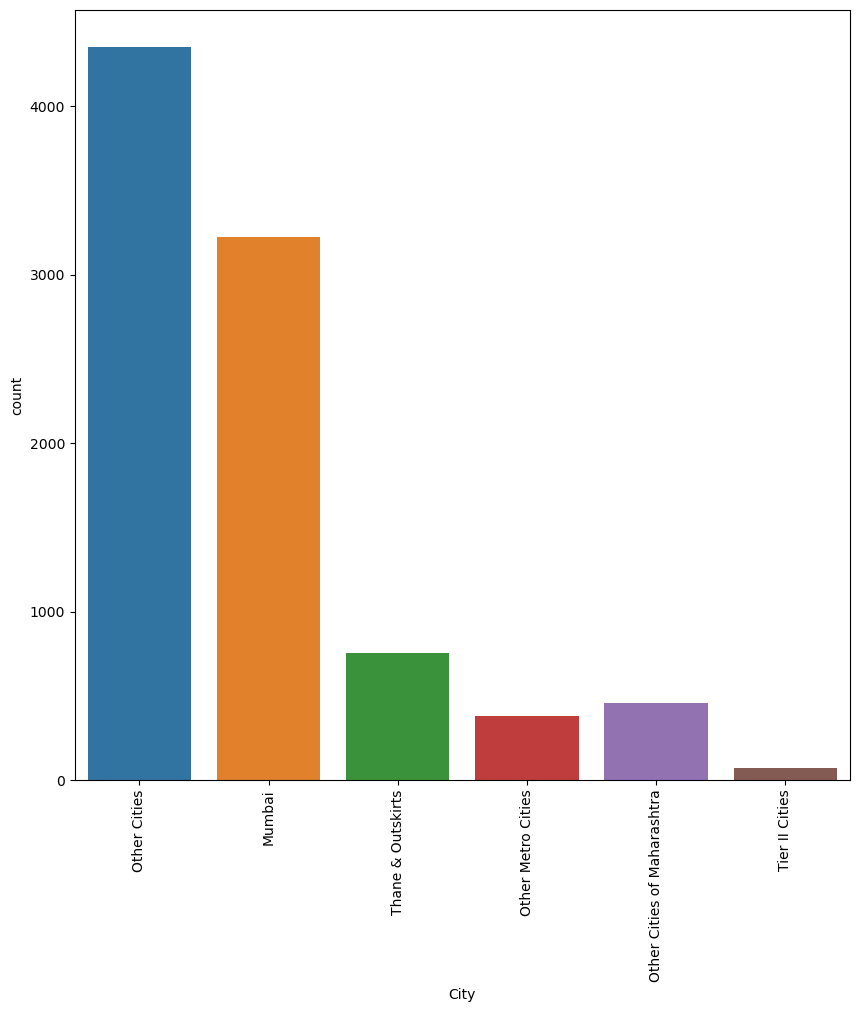

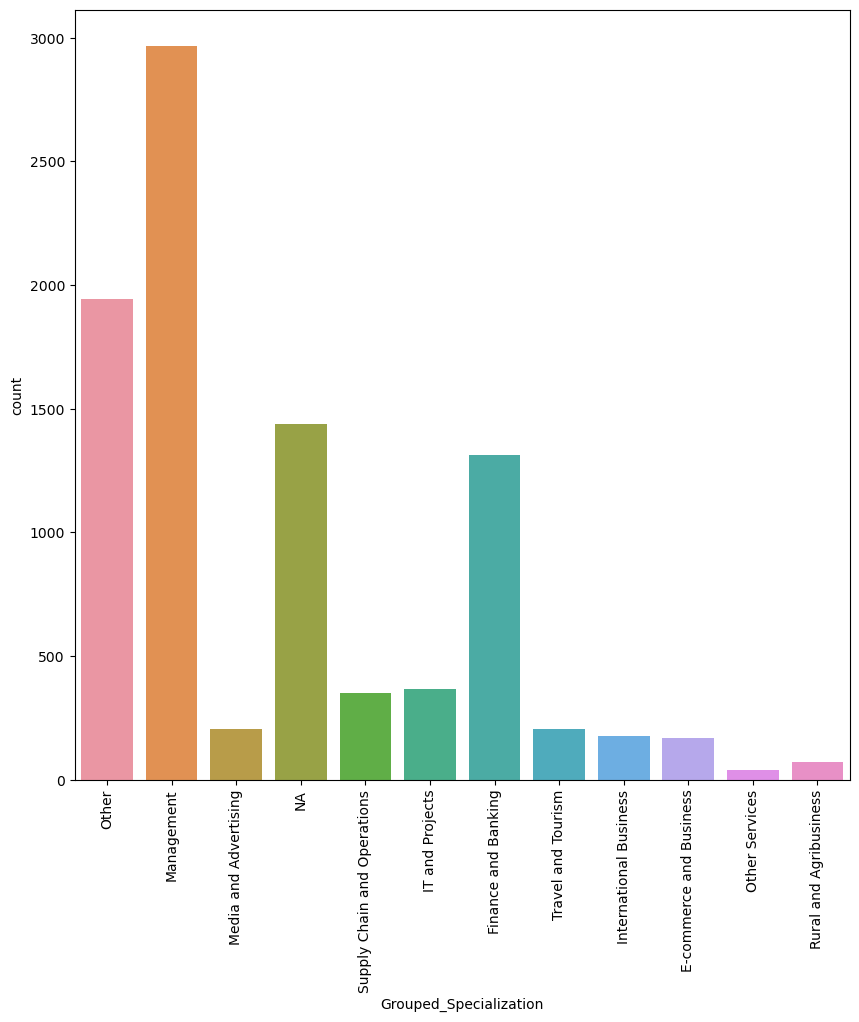

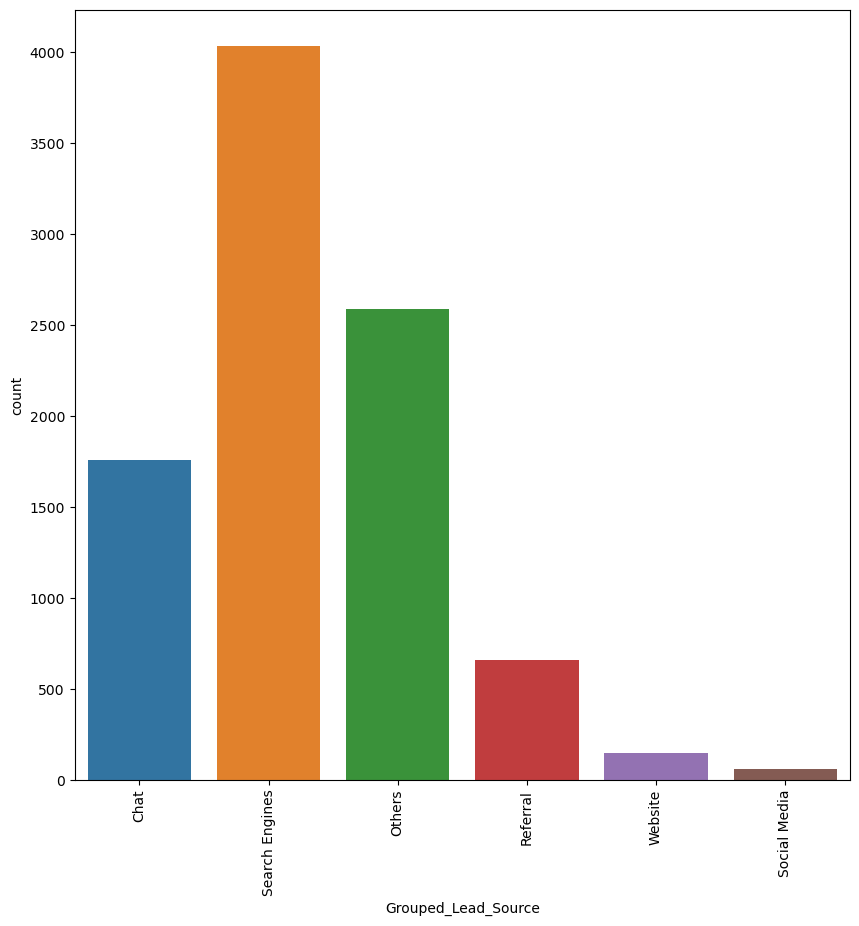

In [94]:
for i in c_col:
    plt.figure(figsize=(10,10))
    sns.countplot(data = leads_df , x = i)
    plt.xticks(rotation=90)
    plt.show()

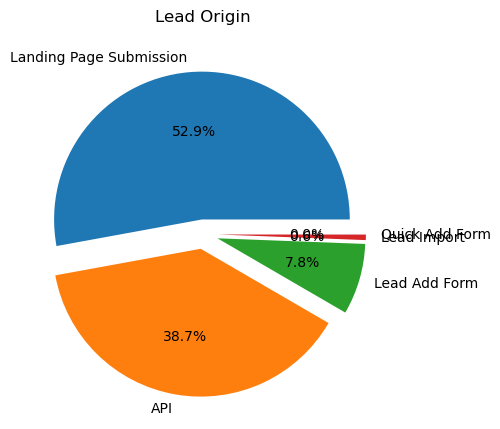

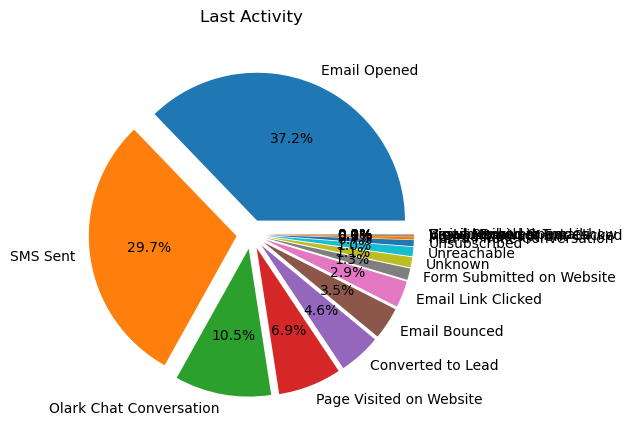

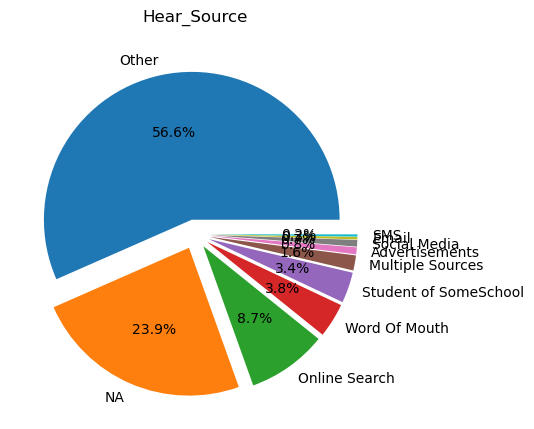

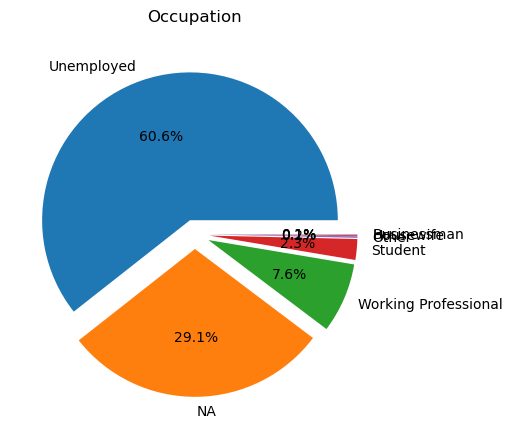

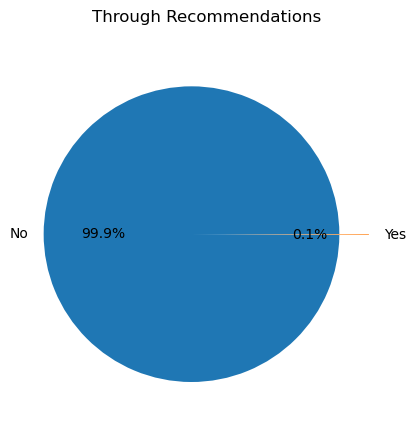

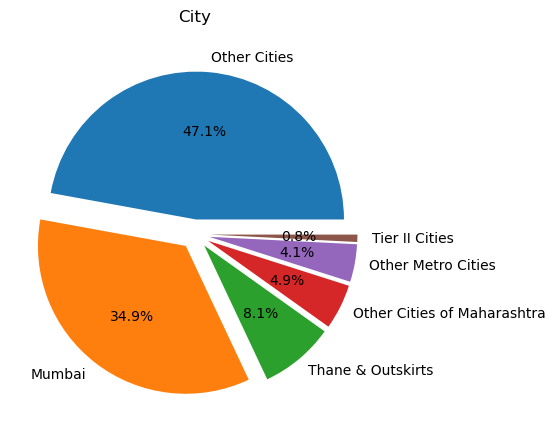

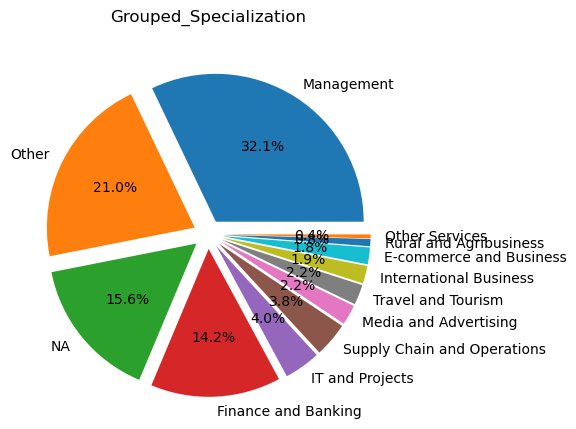

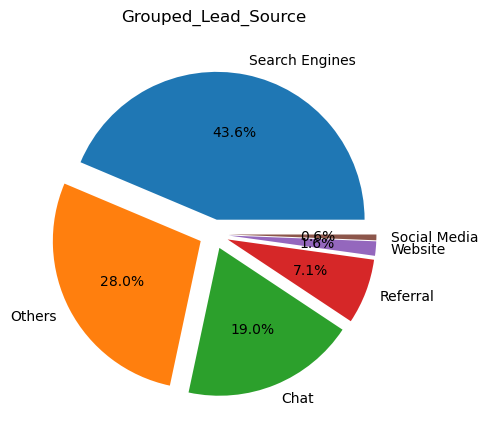

In [96]:
for i in c_col:
    d = leads_df[i].value_counts(normalize= True).plot.pie(autopct='%1.1f%%',explode=[0.1] * len(leads_df[i].unique()))
    d.set_title('')
    plt.title(i, pad=20) 
    plt.ylabel("")
    plt.show()


In [98]:
#dropping through recommendations column as its highly skewed
leads_df.drop(['Through Recommendations'],axis=1,inplace=True)

###  Numerical univariate analysis 

In [102]:
c_col = [i for i in leads_df.columns if leads_df[i].dtype in ['int','float'] and i!='Lead Number']
l = [i for i in leads_df.columns if i in c_col]
l

['Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'A free copy of Mastering The Interview']

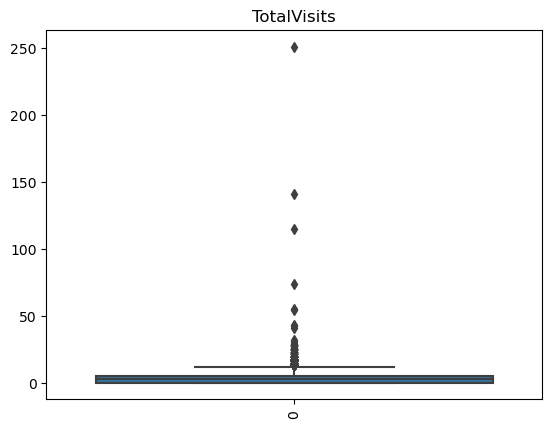

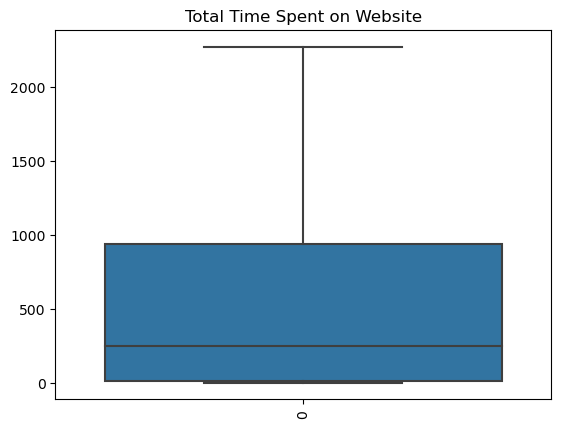

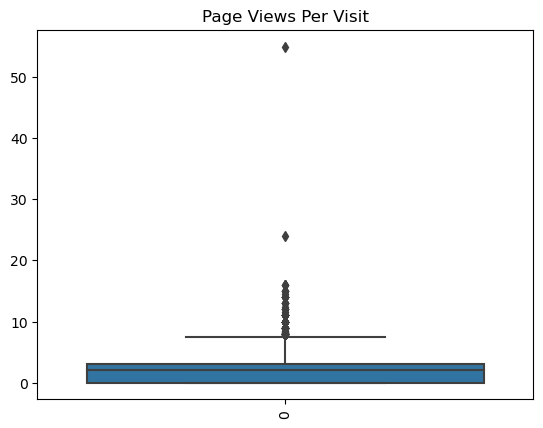

In [106]:
c_col=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for i in c_col:
    sns.boxplot(leads_df[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

In [114]:
#Outliers are present in dataset 
#quantile([0.25, 0.50, 0.75])
leads_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].agg(['min','max','median','mean'])


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
min,0.000000,0.000000,0.000000
max,251.000000,2272.000000,55.000000
median,3.000000,248.000000,2.000000
mean,3.394156,487.698268,2.327787


In [115]:
leads_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].quantile([0.25, 0.50, 0.75])


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0.25,0.0,12.0,0.0
0.50,3.0,248.0,2.0
0.75,5.0,936.0,3.0


In [120]:
leads_df[leads_df['TotalVisits']>50]['TotalVisits'].value_counts()

55     1
141    1
74     1
54     1
115    1
251    1
Name: TotalVisits, dtype: int64

In [122]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Do Not Call                             9240 non-null   int64  
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   int64  
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Hear_Source                             9240 non-null   object 
 10  Occupation                              9240 non-null   obje

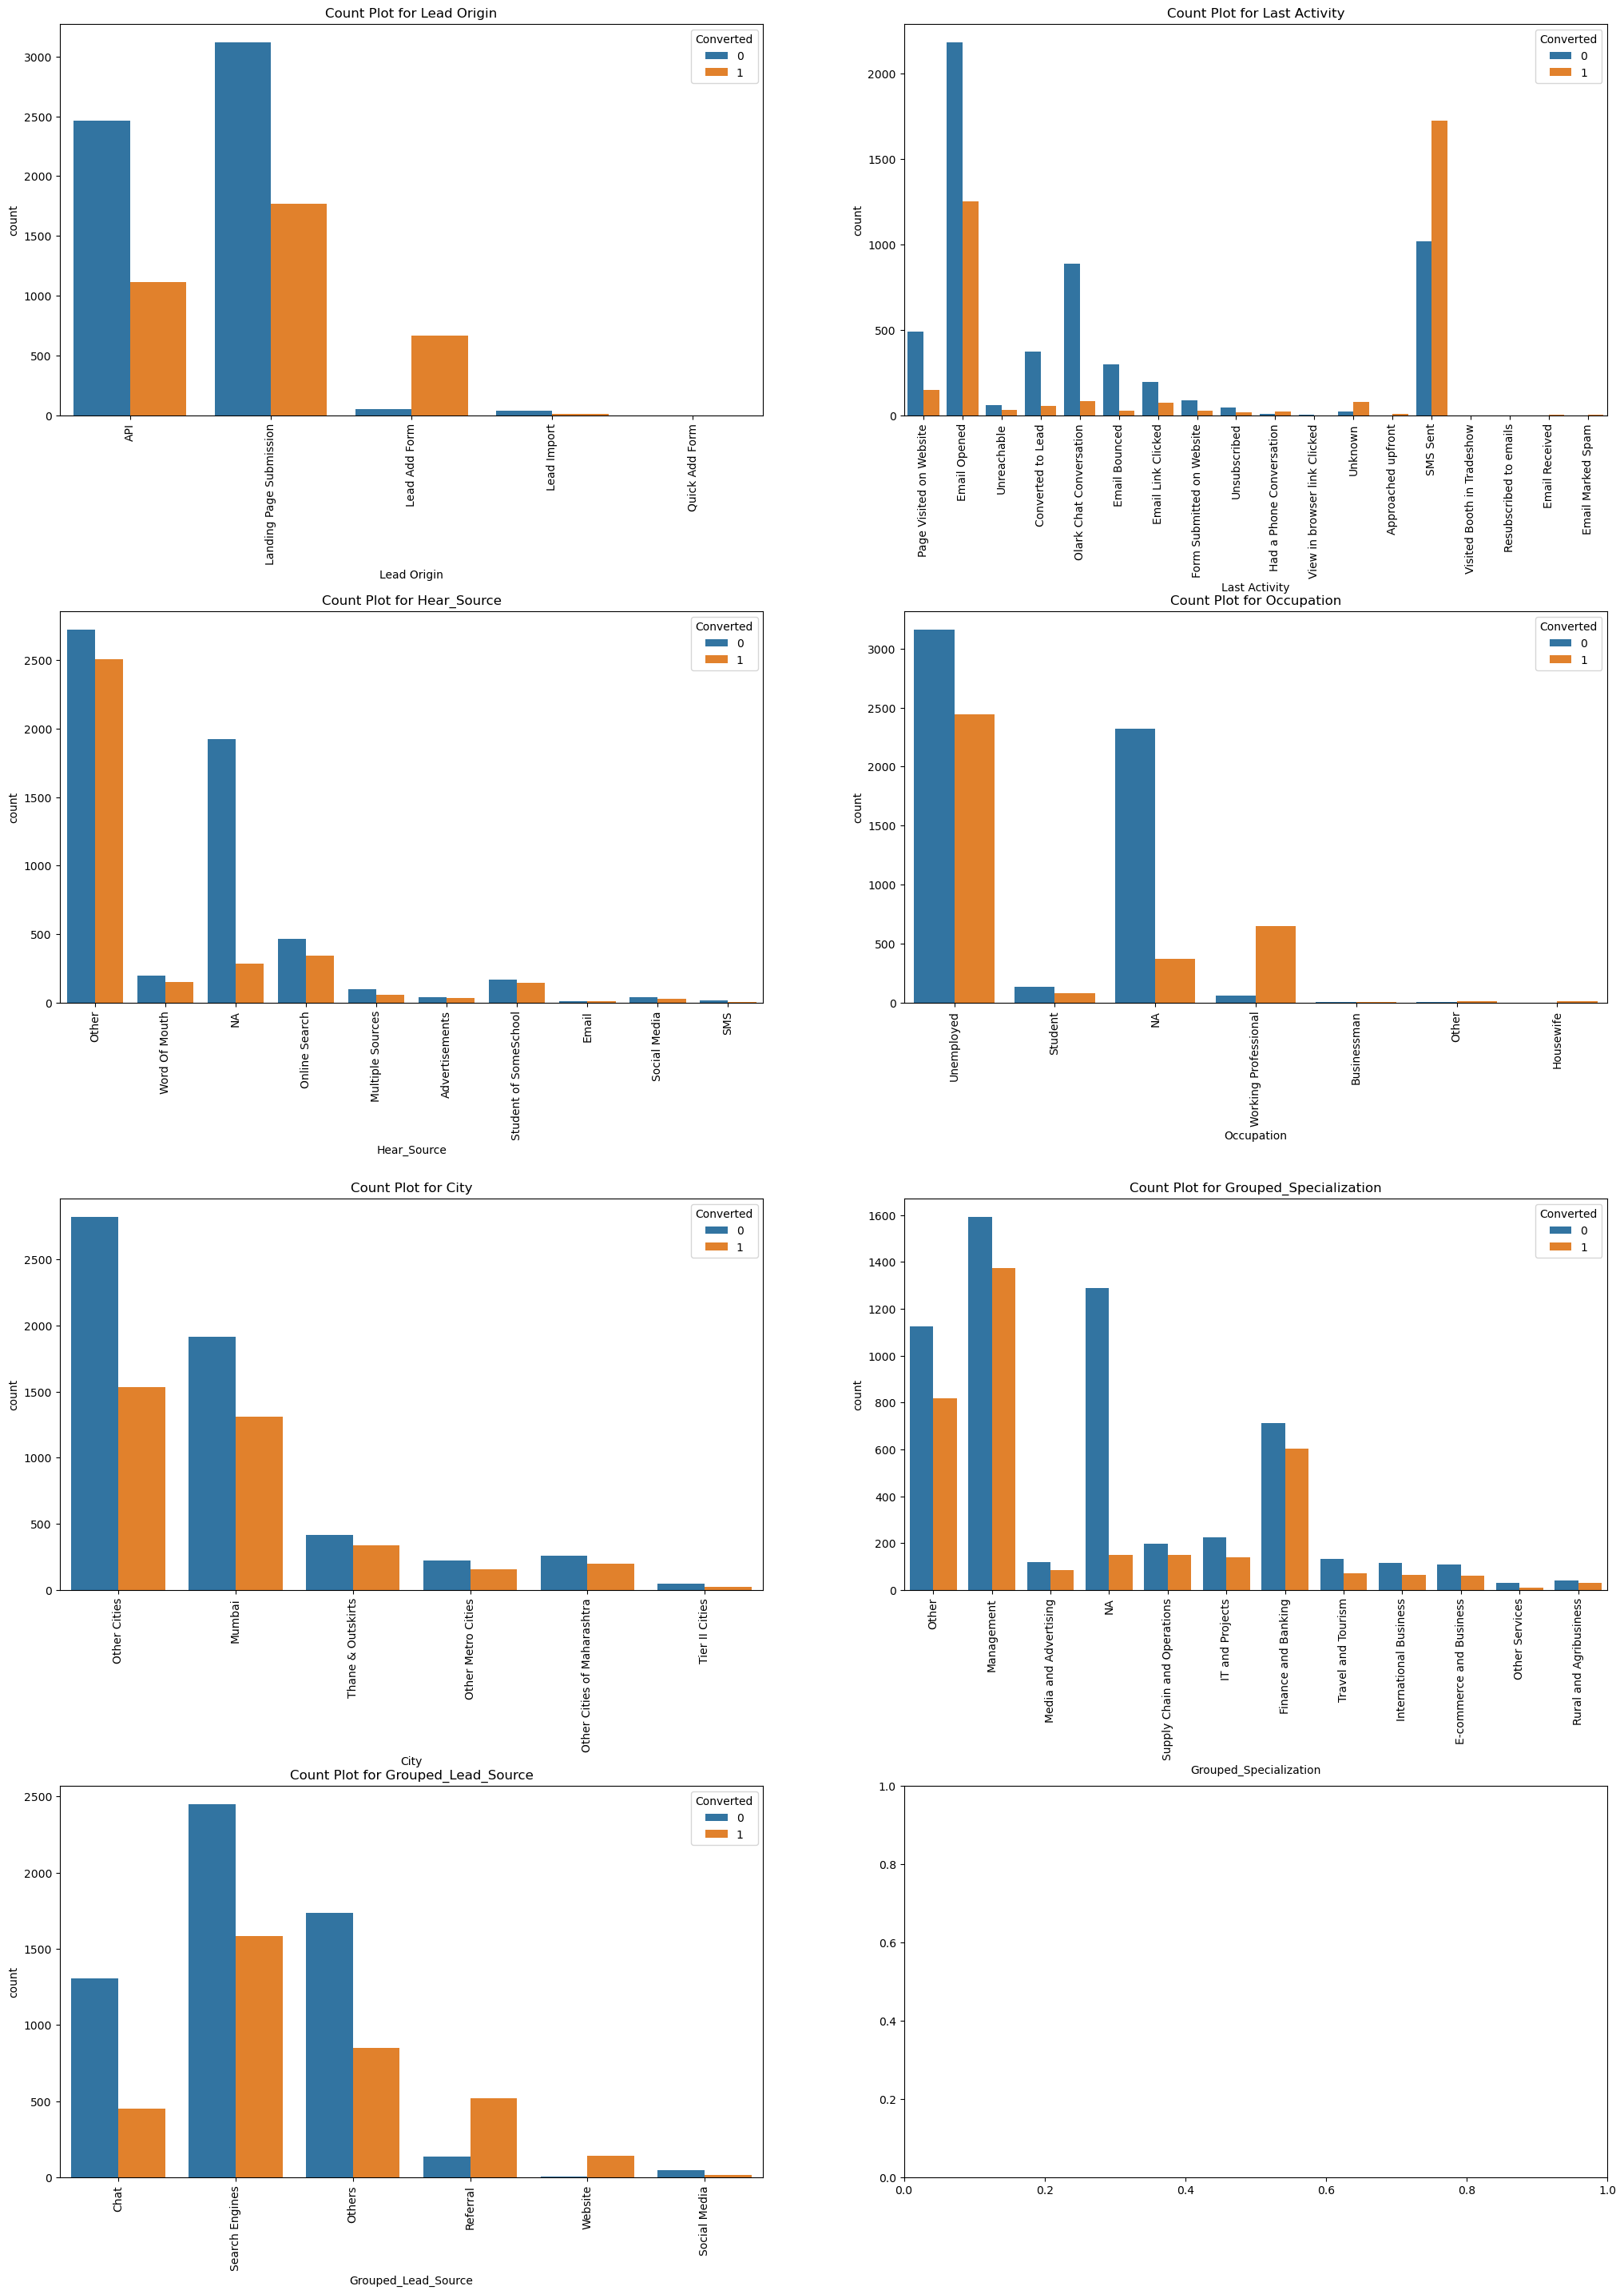

In [156]:
# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 35))
fig.subplots_adjust(hspace=0.5)

# List of categorical features
categorical_features = ['Lead Origin', 'Last Activity', 'Hear_Source', 'Occupation', 'City', 'Grouped_Specialization', 'Grouped_Lead_Source']

# Loop through each feature and create count plots
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='Converted', data=leads_df, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Count Plot for {feature}')
    axes[i // 2, i % 2].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for each subplot

plt.show()


In [137]:
#Observation 
#Landing Page submission and API have high conversion count and lowest is Quick Ad form
#Those with email opened and sms sent have high converted count
#Unemployed and working professionals have high count of being converted
#People belonging to Mumbai and Other cities have high conversion count and Tier 2 cities have the lowest
#Management and Fianance and Banking have highest conversion count and Rural and Agribusiness have the lowest
#Referral and Search Engine have high conversion count , social meadia has the lowest.

In [158]:
#reducing dimensionality of Last Activity

# Define a mapping for grouping similar activities
activity_mapping = {
    'Email Opened': 'Email Actions',
    'SMS Sent': 'Communication',
    'Olark Chat Conversation': 'Communication',
    'Page Visited on Website': 'Website Interaction',
    'Converted to Lead': 'Lead Conversion',
    'Email Bounced': 'Email Actions',
    'Email Link Clicked': 'Email Actions',
    'Form Submitted on Website': 'Website Interaction',
    'Unknown': 'Other',
    'Unreachable': 'Other',
    'Unsubscribed': 'Email Actions',
    'Had a Phone Conversation': 'Communication',
    'Approached upfront': 'Communication',
    'View in browser link Clicked': 'Email Actions',
    'Email Received': 'Email Actions',
    'Email Marked Spam': 'Email Actions',
    'Visited Booth in Tradeshow': 'Event Participation',
    'Resubscribed to emails': 'Email Actions'
}

# Map the original 'Last Activity' column to the new grouped categories
leads_df['Grouped_Last_Activity'] = leads_df['Last Activity'].map(activity_mapping)
leads_df.drop(['Last Activity'],axis=1,inplace=True)

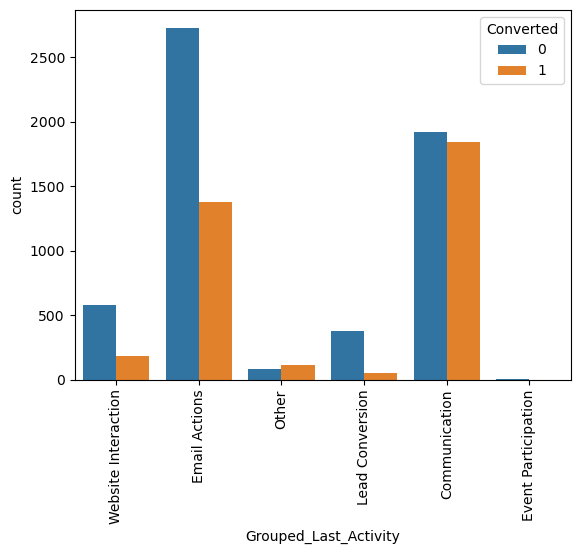

In [161]:
sns.countplot(x='Grouped_Last_Activity', hue='Converted', data=leads_df)
plt.xticks(rotation=90)
plt.show()

In [140]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Do Not Call                             9240 non-null   int64  
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   int64  
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Hear_Source                             9240 non-null   object 
 10  Occupation                              9240 non-null   obje

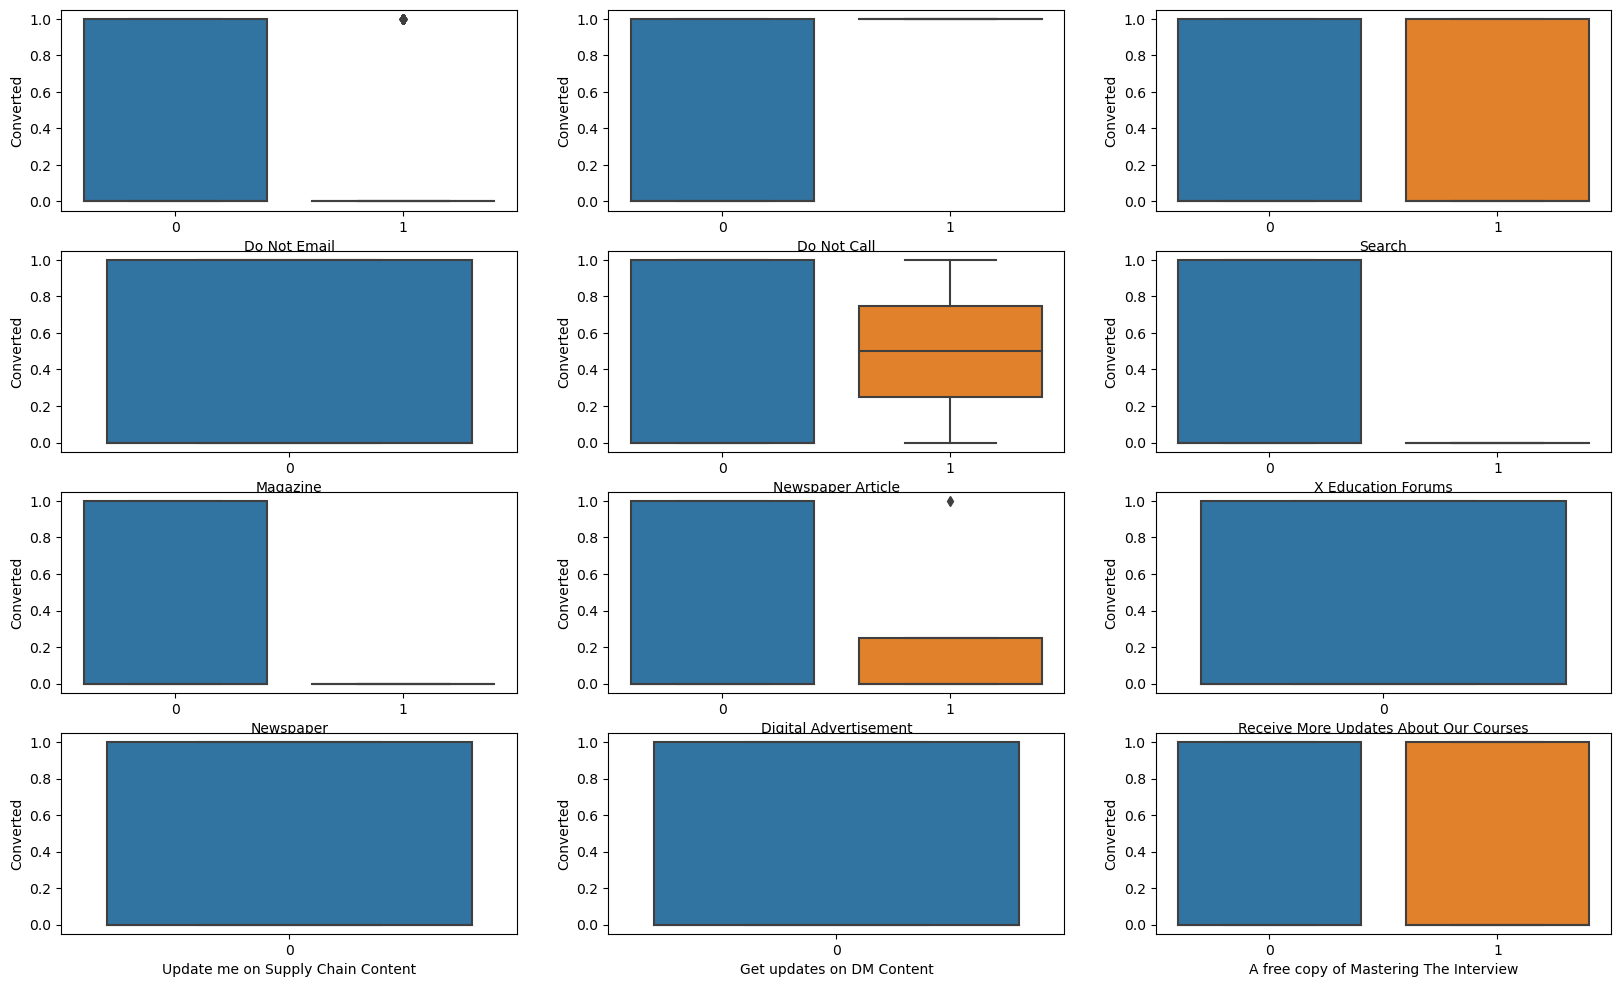

In [142]:
plt.figure(figsize=(20, 12))
plt.subplot(4,3,1)
sns.boxplot(x = 'Do Not Email', y = 'Converted', data = leads_df)
plt.subplot(4,3,2)
sns.boxplot(x = 'Do Not Call', y = 'Converted', data = leads_df)
plt.subplot(4,3,3)
sns.boxplot(x = 'Search', y = 'Converted', data = leads_df)
plt.subplot(4,3,4)
sns.boxplot(x = 'Magazine', y = 'Converted', data = leads_df)
plt.subplot(4,3,5)
sns.boxplot(x = 'Newspaper Article', y = 'Converted', data = leads_df)
plt.subplot(4,3,6)
sns.boxplot(x = 'X Education Forums', y = 'Converted', data = leads_df)
plt.subplot(4,3,7)
sns.boxplot(x = 'Newspaper', y = 'Converted', data = leads_df)
plt.subplot(4,3,8)
sns.boxplot(x = 'Digital Advertisement', y = 'Converted', data = leads_df)
plt.subplot(4,3,9)
sns.boxplot(x = 'Receive More Updates About Our Courses', y = 'Converted', data = leads_df)
plt.subplot(4,3,10)
sns.boxplot(x = 'Update me on Supply Chain Content', y = 'Converted', data = leads_df)
plt.subplot(4,3,11)
sns.boxplot(x = 'Get updates on DM Content', y = 'Converted', data = leads_df)
plt.subplot(4,3,12)
sns.boxplot(x = 'A free copy of Mastering The Interview', y = 'Converted', data = leads_df)

plt.show()


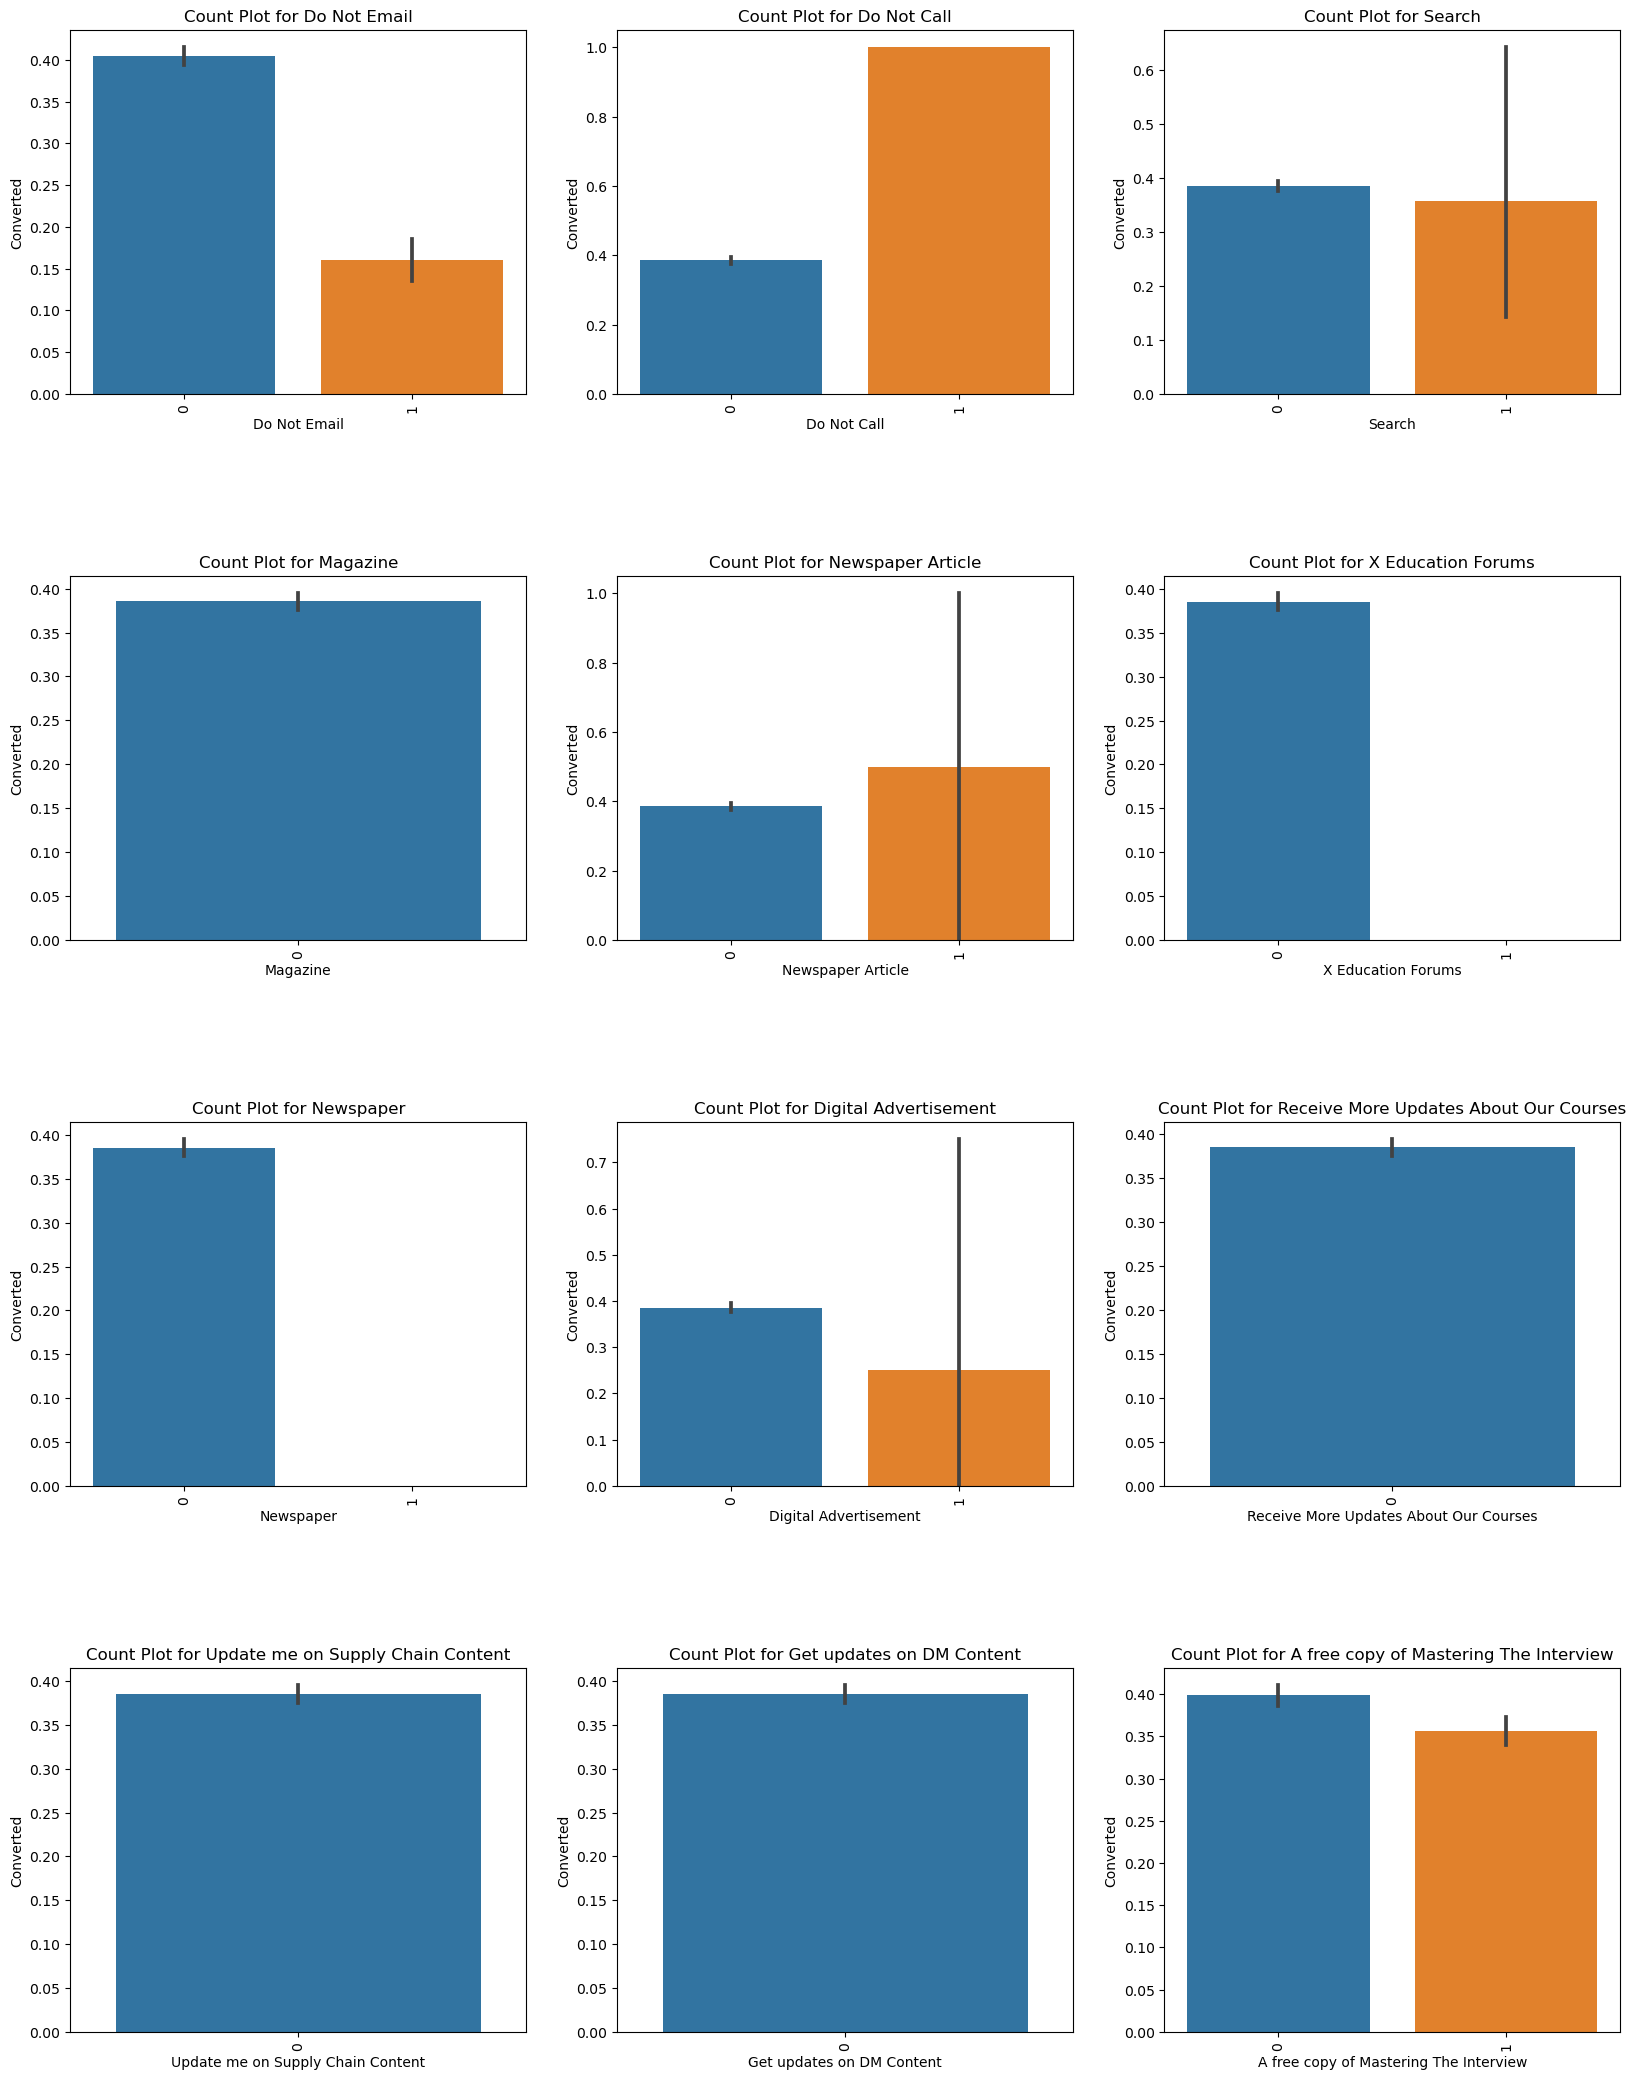

In [148]:
# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 26))
fig.subplots_adjust(hspace=0.5)

# List of categorical features
categorical_features = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
                         'Newspaper', 'Digital Advertisement', 'Receive More Updates About Our Courses',
                         'Update me on Supply Chain Content', 'Get updates on DM Content',
                         'A free copy of Mastering The Interview']

# Loop through each feature and create count plots
for i, feature in enumerate(categorical_features):
    sns.barplot(x=feature, y='Converted', data=leads_df, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Count Plot for {feature}')
    axes[i // 3, i % 3].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for each subplot

plt.show()


In [150]:
#dropping unwanted skewed features
#magazine
#Receive More Updates About Our Courses
#Update me on Supply Chain Content
#Newspaper
#Get updates on DM Content
#X Education Forums

leads_df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Newspaper','Get updates on DM Content','X Education Forums'],inplace=True,axis=1)

In [162]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Do Not Call                             9240 non-null   int64  
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   int64  
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Hear_Source                             9240 non-null   object 
 9   Occupation                              9240 non-null   object 
 10  Search                                  9240 non-null   int6

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [164]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_df[['Lead Origin', 'Hear_Source', 'Occupation', 'City','Grouped_Specialization','Grouped_Lead_Source','Grouped_Last_Activity']], drop_first=True)

# Adding the results to the master dataframe
leads_df = pd.concat([leads_df, dummy1], axis=1)

In [166]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 63 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Lead Number                                         9240 non-null   int64  
 1   Lead Origin                                         9240 non-null   object 
 2   Do Not Email                                        9240 non-null   int64  
 3   Do Not Call                                         9240 non-null   int64  
 4   Converted                                           9240 non-null   int64  
 5   TotalVisits                                         9240 non-null   int64  
 6   Total Time Spent on Website                         9240 non-null   int64  
 7   Page Views Per Visit                                9240 non-null   float64
 8   Hear_Source                                         9240 non-null   object 
 9

#### Dropping the repeated variables

In [167]:
# We have created dummies for the below variables, so we can drop them
leads_df.drop(['Lead Origin','Hear_Source','Occupation','City','Grouped_Specialization', 'Grouped_Lead_Source', 'Grouped_Last_Activity'],axis= 1,inplace=True)

In [168]:
leads_df.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,...,Grouped_Lead_Source_Others,Grouped_Lead_Source_Referral,Grouped_Lead_Source_Search Engines,Grouped_Lead_Source_Social Media,Grouped_Lead_Source_Website,Grouped_Last_Activity_Email Actions,Grouped_Last_Activity_Event Participation,Grouped_Last_Activity_Lead Conversion,Grouped_Last_Activity_Other,Grouped_Last_Activity_Website Interaction
0,660737,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,660728,0,0,0,5,674,2.5,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,660727,0,0,1,2,1532,2.0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,660719,0,0,0,1,305,1.0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,660681,0,0,1,2,1428,1.0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [169]:
# Checking for outliers in the continuous variables
num_leads_df = leads_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.394156,487.698268,2.327787
std,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


In [170]:
# handling outlier for TotalVisits , rest looks fine
threshold = leads_df['TotalVisits'].quantile(0.99)
leads_df['TotalVisits'] = leads_df['TotalVisits'].clip(upper=threshold)

In [171]:
# Checking for outliers in the continuous variables
num_leads_df = leads_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.283333,487.698268,2.327787
std,3.253250,548.021466,2.164258
min,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


In [172]:
#checking missing values
leads_df.isna().sum()/len(leads_df) * 100

Lead Number                                           0.0
Do Not Email                                          0.0
Do Not Call                                           0.0
Converted                                             0.0
TotalVisits                                           0.0
Total Time Spent on Website                           0.0
Page Views Per Visit                                  0.0
Search                                                0.0
Newspaper Article                                     0.0
Digital Advertisement                                 0.0
A free copy of Mastering The Interview                0.0
Lead Origin_Landing Page Submission                   0.0
Lead Origin_Lead Add Form                             0.0
Lead Origin_Lead Import                               0.0
Lead Origin_Quick Add Form                            0.0
Hear_Source_Email                                     0.0
Hear_Source_Multiple Sources                          0.0
Hear_Source_NA

In [ ]:
# All null values handled

### Step 4: Test-Train Split

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
# Putting feature variable to X
X = leads_df.drop(['Converted','Lead Number'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,...,Grouped_Lead_Source_Others,Grouped_Lead_Source_Referral,Grouped_Lead_Source_Search Engines,Grouped_Lead_Source_Social Media,Grouped_Lead_Source_Website,Grouped_Last_Activity_Email Actions,Grouped_Last_Activity_Event Participation,Grouped_Last_Activity_Lead Conversion,Grouped_Last_Activity_Other,Grouped_Last_Activity_Website Interaction
0,0,0,0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,5,674,2.5,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2,1532,2.0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,1,305,1.0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,2,1428,1.0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [175]:
# Putting response variable to y
y = leads_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [179]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [184]:
from sklearn.preprocessing import MinMaxScaler

In [185]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,...,Grouped_Lead_Source_Others,Grouped_Lead_Source_Referral,Grouped_Lead_Source_Search Engines,Grouped_Lead_Source_Social Media,Grouped_Lead_Source_Website,Grouped_Last_Activity_Email Actions,Grouped_Last_Activity_Event Participation,Grouped_Last_Activity_Lead Conversion,Grouped_Last_Activity_Other,Grouped_Last_Activity_Website Interaction
1871,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6795,0,0,0.235294,0.214349,0.024182,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
3516,0,0,0.294118,0.046655,0.045455,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8105,0,0,0.294118,0.541373,0.090909,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3934,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [188]:
### Checking the Conversion Rate
Converted = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
Converted

38.53896103896104

We have almost 38% churn rate

### Step 6: Looking at Correlations

In [ ]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,30))        # Size of the figure
sns.heatmap(leads_df.corr(),annot = True)
plt.show()